In [171]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
df=pd.read_csv(r'C:\Users\paas9002\Desktop\perrin-freres-monthly-champagne-.csv')

In [173]:

df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [174]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [175]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [176]:
df.drop(106,axis=0,inplace=True)

In [177]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [178]:
df.drop(105,axis=0,inplace=True)

In [179]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [180]:
df['Month']=pd.to_datetime(df['Month'])

In [181]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [182]:
df.set_index('Month',inplace=True)

In [183]:

df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [184]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


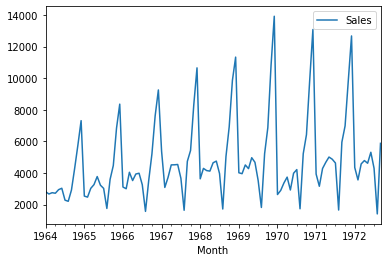

In [185]:
df.plot()

In [186]:
from statsmodels.tsa.stattools import adfuller


In [187]:
test_result=adfuller(df['Sales'])

In [188]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [189]:

adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [190]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [191]:
df.head(14)


,Sales,Seasonal First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [192]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


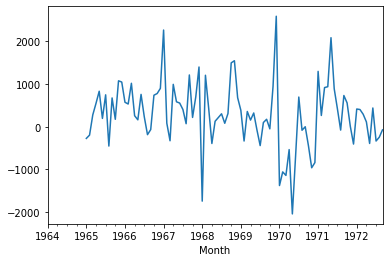

In [193]:
df['Seasonal First Difference'].plot()

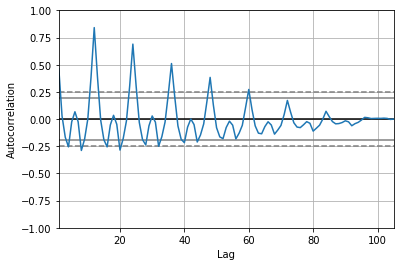

In [194]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [195]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

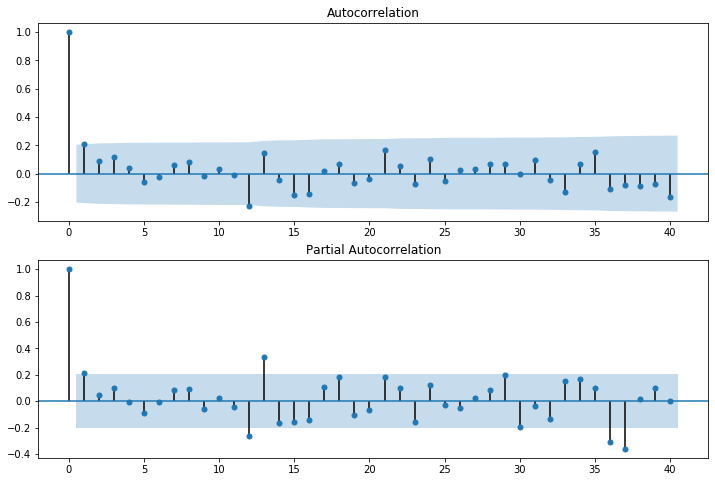

In [196]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [197]:
from statsmodels.tsa.arima_model import ARIMA

In [198]:
train =df.iloc[:-21]
test=df.iloc[-21:]
print(train.shape,test.shape)

(84, 2) (21, 2)


In [199]:
model=ARIMA(train['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\paas9002\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\paas9002\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [200]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -755.862
Method:                       css-mle   S.D. of innovations           2138.374
Date:                Thu, 01 Dec 2022   AIC                           1519.724
Time:                        15:18:31   BIC                           1529.399
Sample:                    02-01-1964   HQIC                          1523.611
                         - 12-01-1970                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            42.9337     19.146      2.242      0.025       5.409      80.459
ar.L1.D.Sales     0.5117      0.103      4.969      0.000       0.310       0.714
ma.L1.D.Sales    -1.0000      0.031    -32.471      0.000      -1.060      -0.940
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9542           +0.0000j            1.9542            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

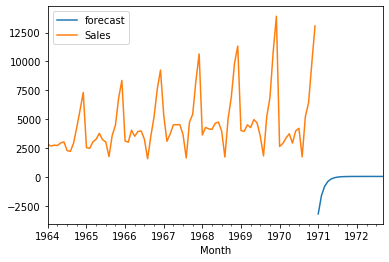

In [201]:
df['forecast']=model_fit.predict(start=84,end=104,dynamic=True)
df['forecast'].plot(legend=True)
train['Sales'].plot(legend=True)


In [202]:
model=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\paas9002\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\paas9002\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


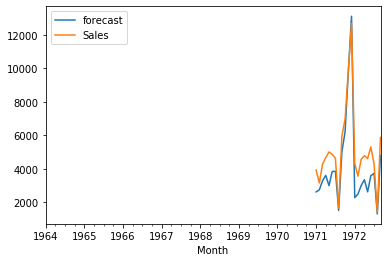

In [203]:
df['forecast']=results.predict(start=84,end=104,dynamic=True)
df['forecast'].plot(legend=True)
test['Sales'].plot(legend=True)



In [204]:
test['Sales'].mean()


5070.571428571428

In [205]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(df['forecast'][84:],test['Sales']))
print(rmse)

1187.701470870739


In [206]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [207]:

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [208]:
future_datest_df.tail()

,Sales,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [209]:

future_df=pd.concat([df,future_datest_df])


C:\Users\paas9002\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


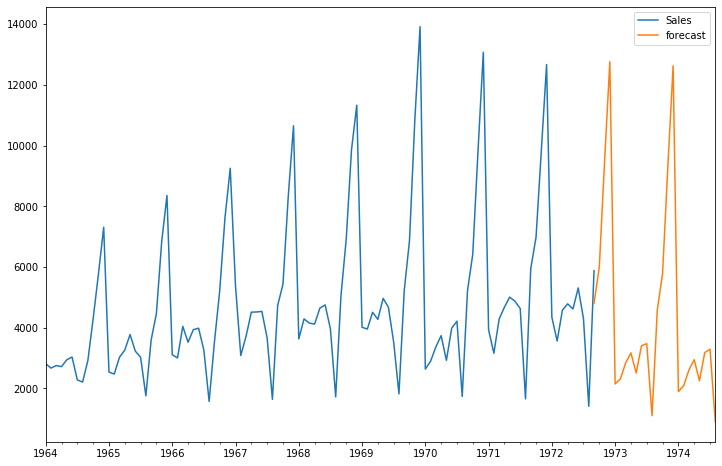

In [214]:
future_df['forecast'] = results.predict(start = 104, end = 128, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [215]:
future_df.iloc[104:]

,Sales,Seasonal First Difference,forecast
1972-09-01,5877.0,-74.0,4799.383235
1972-10-01,NaN,NaN,6004.543504
1972-11-01,NaN,NaN,9481.786478
1972-12-01,NaN,NaN,12762.433145
1973-01-01,NaN,NaN,2150.105166
1973-02-01,NaN,NaN,2314.943363
1973-03-01,NaN,NaN,2843.850280
1973-04-01,NaN,NaN,3171.994653
1973-05-01,NaN,NaN,2512.542073
1973-06-01,NaN,NaN,3407.610121
